<a href="https://colab.research.google.com/github/zyazam/Approved-project/blob/main/Copy_of_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Welcome To The Machine Learning (1) Project***

***What we are trying to do in this project is to apply everything we learned in the machine learning course, from analyzing, cleaning, and processing data to applying machine learning algorithms.***

## And of course, we will use this dataset [**Dataset**](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis) to practice sorcery on it.


## ***We will do our best to carry out all the required tasks..***

## **The students in charge of this project:**
- ***Hamza Mu'in Rashid Issa***
- ***Zaid Yusef GH. Hashash***



---






---




- In the first cell, we will import the libraries used in the project.

In [1]:
import pandas as pd
import numpy as np
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

- Download data directly from Kaggle, via **API Token**

  -**(google.colab files)**
  This is the library used to upload API tokens

In [2]:
# upload API Token

from google.colab import files
files.upload()

# Create a new folder (directory) named .kaggle in the user's home folder (~)
!mkdir -p ~/.kaggle
# Copy the access key file to the folder we created in step one
!cp kaggle.json ~/.kaggle/
# Change the access permissions for the copied file to make it secure and private
!chmod 600 ~/.kaggle/kaggle.json

# Retrieve dataset from Kaggle command
!kaggle datasets download -d psparks/instacart-market-basket-analysis

# Unzip files command
!unzip -q instacart-market-basket-analysis.zip -d instacart_data

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis
License(s): CC0-1.0
 69% 137M/197M [00:00<00:00, 1.43GB/s]
100% 197M/197M [00:00<00:00, 991MB/s] 


In [3]:
# listdir() >> Available files
data = 'instacart_data/'

print("Available files:")
print(os.listdir(data))

Available files:
['aisles.csv', 'order_products__train.csv', 'orders.csv', 'products.csv', 'departments.csv', 'order_products__prior.csv']


In [4]:
aisles = pd.read_csv(data + 'aisles.csv')
orders = pd.read_csv(data + 'orders.csv')
departments = pd.read_csv(data + 'departments.csv')
products = pd.read_csv(data + 'products.csv')
order_products_prior = pd.read_csv(data + 'order_products__prior.csv')

In [5]:
print(aisles.info())
print("------------------------------------------------")
print(orders.info())
print("------------------------------------------------")
print(departments.info())
print("------------------------------------------------")
print(products.info())
print("------------------------------------------------")
print(order_products_prior.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data co

In [6]:
print(aisles.describe())
print("------------------------------------------------")
print(orders.describe())
print("------------------------------------------------")
print(departments.describe())
print("------------------------------------------------")
print(products.describe())
print("------------------------------------------------")
print(order_products_prior.describe())

         aisle_id
count  134.000000
mean    67.500000
std     38.826537
min      1.000000
25%     34.250000
50%     67.500000
75%    100.750000
max    134.000000
------------------------------------------------
           order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e+06  1.543850e+05  2.300000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       3.421083e+06            3.214874e+06  
mean        1.345202e+01            1.111484e+01  
std         4.226088e+00            9.206737e+00  

In [7]:
Types = {
    'aisle_id': 'int32',
    'aisle': 'category',
    'order_id': 'int32',
    'user_id': 'int32',
    'eval_set': 'category',
    'order_number': 'int32',
    'order_dow': 'int32',
    'order_hour_of_day': 'int32',
    'days_since_prior_order': 'float16',
    'department_id': 'int8',
    'department': 'category',
    'product_id': 'int32',
    'product_name': 'category',
    'add_to_cart_order': 'int32',
    'reordered': 'int8',
}


# Reading files using enhanced data types
aisles = pd.read_csv(data + 'aisles.csv', dtype={i: Types.get(i, None) for i in ['aisle_id','aisle']})

departments = pd.read_csv(data + 'departments.csv', dtype={i: Types.get(i, None) for i in ['department_id','department']})

products = pd.read_csv(data + 'products.csv', dtype={i: Types.get(i, None) for i in ['product_id', 'aisle_id', 'department_id',' product_name']})

# Read orders, excluding 'days_since_prior_order' from explicit dtype setting during read_csv
orders = pd.read_csv(data + 'orders.csv', dtype={i: Types.get(i, None) for i in ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day','eval_set']})
# Convert 'days_since_prior_order' to float16 after loading the DataFrame
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype('float16')

order_products_prior = pd.read_csv(data + 'order_products__prior.csv', dtype={i: Types.get(i, None) for i in ['order_id', 'product_id', 'add_to_cart_order', 'reordered']})


In [8]:
print(aisles.info())
print("------------------------------------------------")
print(orders.info())
print("------------------------------------------------")
print(departments.info())
print("------------------------------------------------")
print(products.info())
print("------------------------------------------------")
print(order_products_prior.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   aisle_id  134 non-null    int32   
 1   aisle     134 non-null    category
dtypes: category(1), int32(1)
memory usage: 6.0 KB
None
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                category
 3   order_number            int32   
 4   order_dow               int32   
 5   order_hour_of_day       int32   
 6   days_since_prior_order  float16 
dtypes: category(1), float16(1), int32(5)
memory usage: 75.0 MB
None
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entrie

In [9]:
My_Data = pd.merge(orders, order_products_prior,how = 'left', on='order_id')
My_Data = pd.merge(My_Data, products,how = 'left', on='product_id')
My_Data = pd.merge(My_Data, aisles,how = 'left', on='aisle_id')
My_Data = pd.merge(My_Data, departments,how = 'left', on='department_id')
My_Data.head()

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,paper goods,household


In [10]:
My_Data['product_name'] = My_Data['product_name'].astype('category')

In [11]:
print(My_Data.shape)
print("-----------------------------")
print(My_Data.info())

(32640698, 15)
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32640698 entries, 0 to 32640697
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                category
 3   order_number            int32   
 4   order_dow               int32   
 5   order_hour_of_day       int32   
 6   days_since_prior_order  float16 
 7   product_id              float64 
 8   add_to_cart_order       float64 
 9   reordered               float64 
 10  product_name            category
 11  aisle_id                float64 
 12  department_id           float64 
 13  aisle                   category
 14  department              category
dtypes: category(4), float16(1), float64(5), int32(5)
memory usage: 2.1 GB
None


# **• Missing value analysis and visualization**

In [12]:
missing_data = My_Data.isnull().sum()
print(missing_data)

print("-------------------------------")
missing_percentage = (My_Data.isnull().sum() / len(My_Data)) * 100
print(missing_percentage)

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                 206209
add_to_cart_order          206209
reordered                  206209
product_name               206209
aisle_id                   206209
department_id              206209
aisle                      206209
department                 206209
dtype: int64
-------------------------------
order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.366494
product_id                0.631754
add_to_cart_order         0.631754
reordered                 0.631754
product_name              0.631754
aisle_id                  0.631754
department_id            

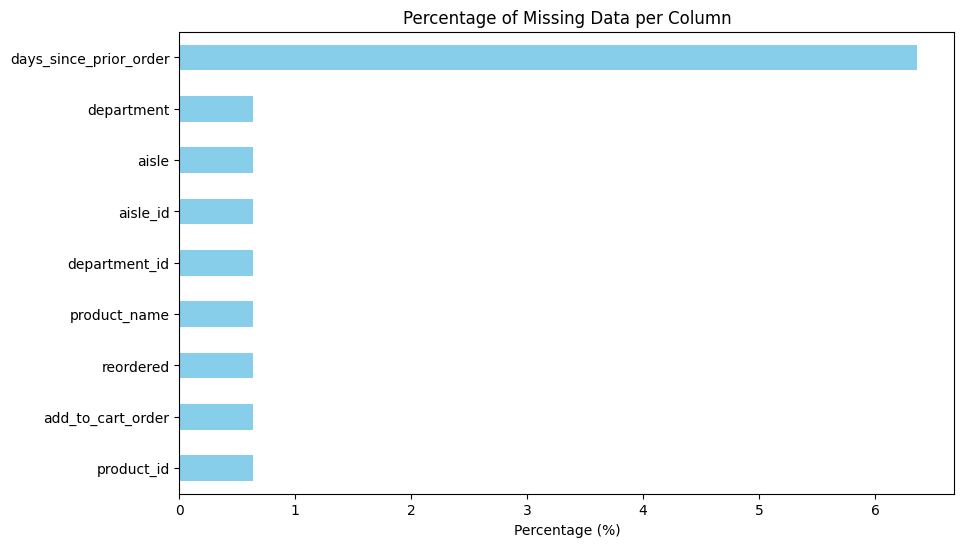

In [13]:
missing_percentage = missing_percentage[missing_percentage > 0]

if not missing_percentage.empty:
    missing_percentage.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
    plt.title('Percentage of Missing Data per Column')
    plt.xlabel('Percentage (%)')
    plt.show()
else:
  print("There are not missing values")

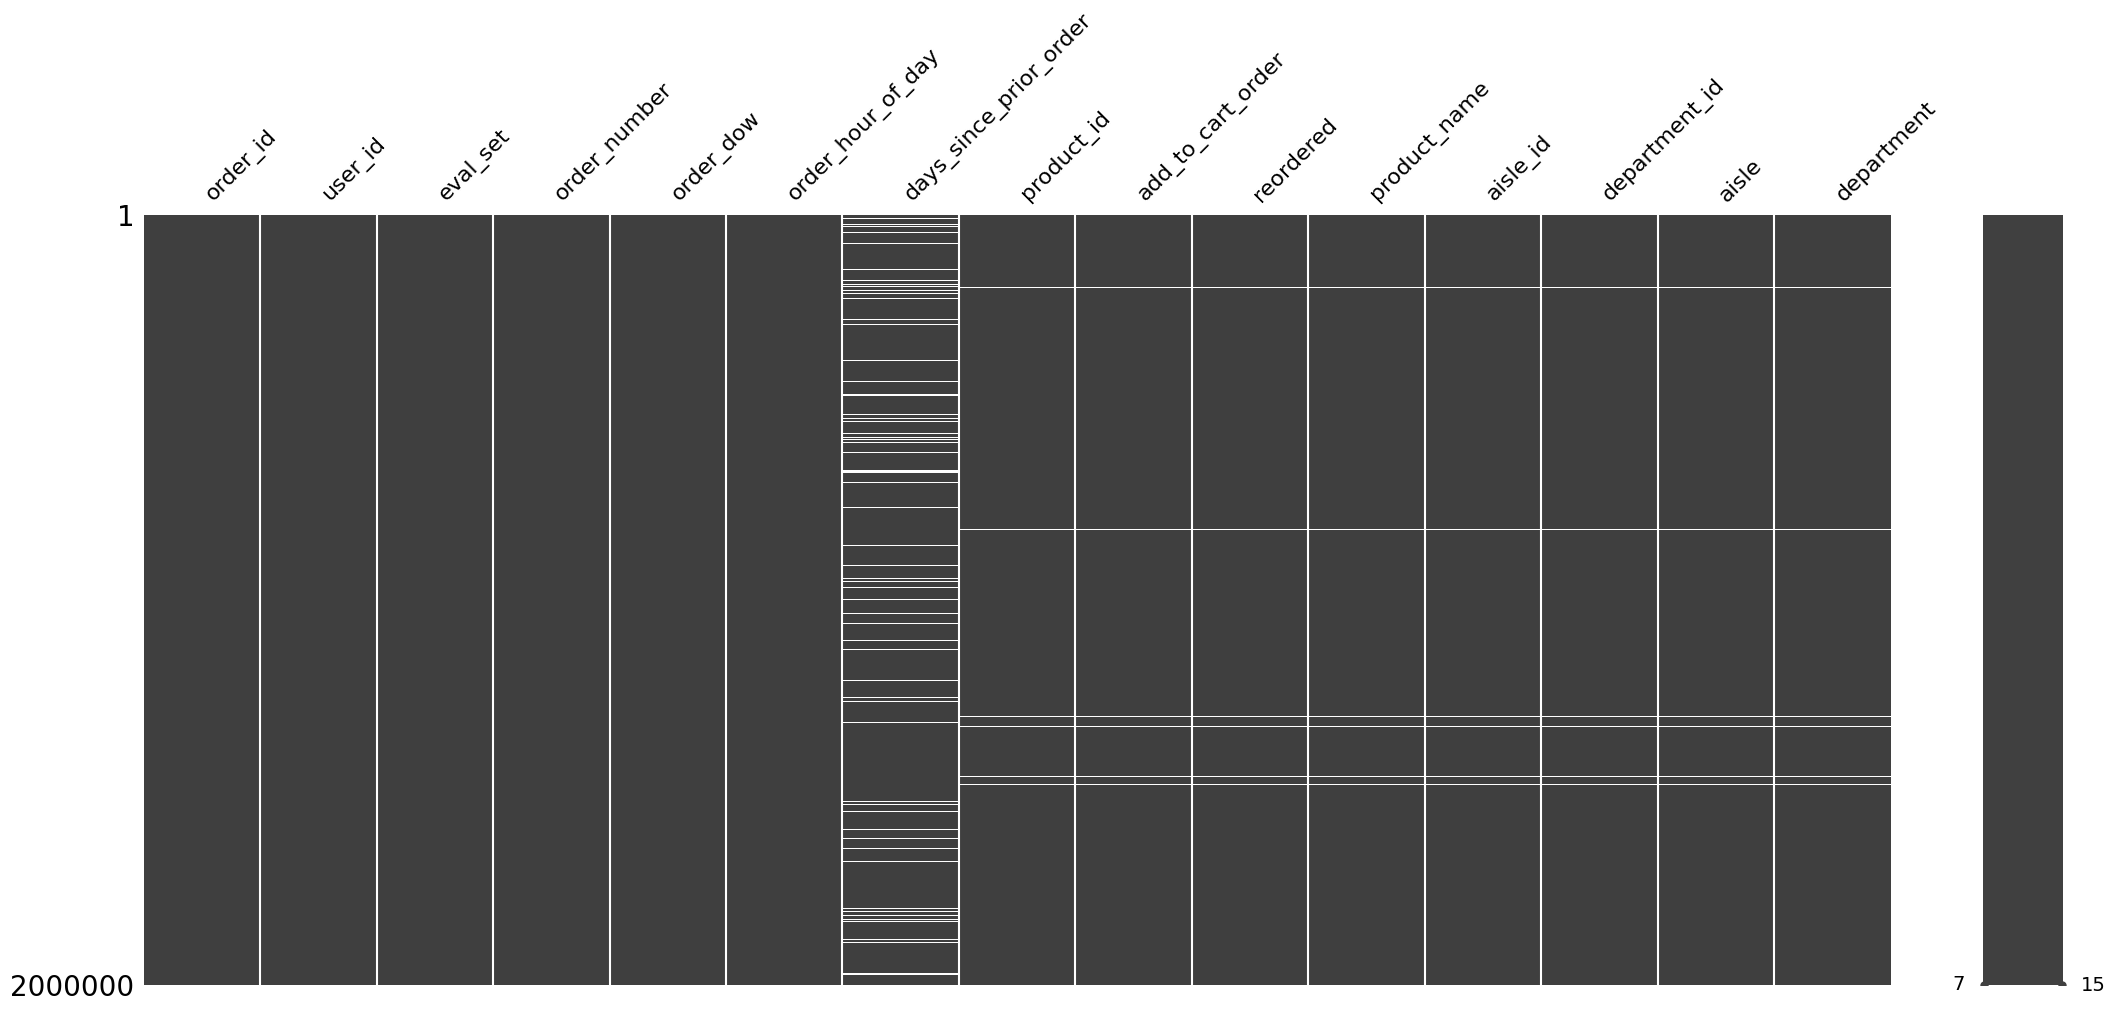

In [14]:
msno.matrix(My_Data.iloc[:2000000, :])
plt.show()

# **• Distribution plots for numeric features and target(s) (histogram, density).**

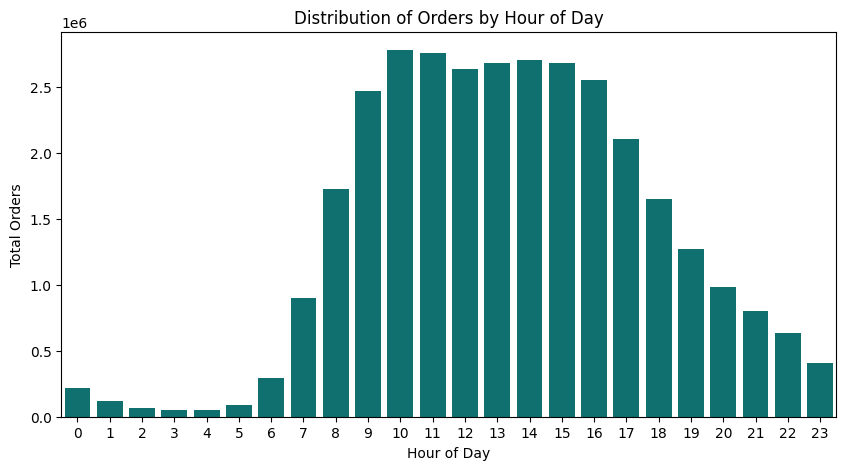

In [15]:
hourly_dist = My_Data['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_dist.index, y=hourly_dist.values, color='teal')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Orders')
plt.show()

/tmp/ipython-input-540565461.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_dist.index, y=dow_dist.values, palette='viridis')


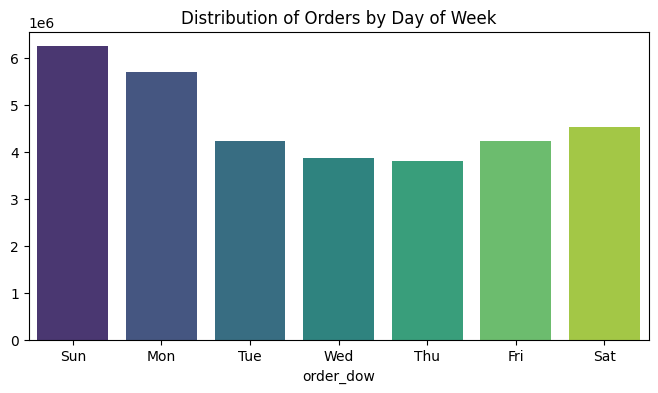

In [16]:
dow_dist = My_Data['order_dow'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=dow_dist.index, y=dow_dist.values, palette='viridis')
plt.title('Distribution of Orders by Day of Week')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()

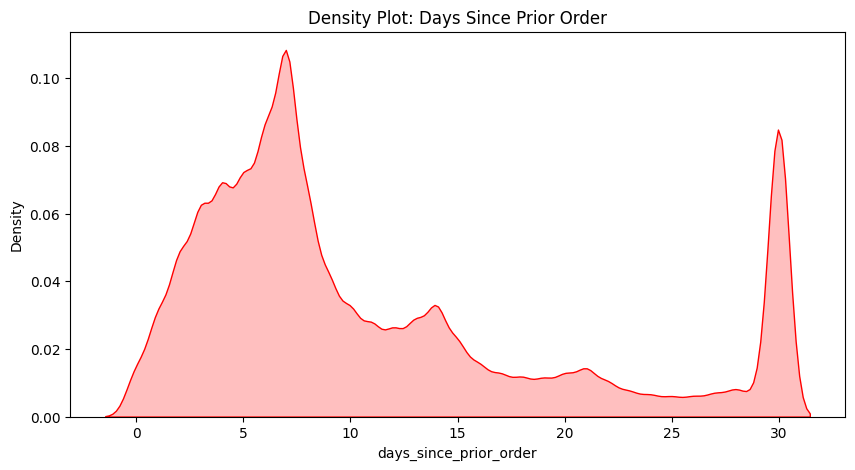

In [17]:
sample_data = My_Data['days_since_prior_order'].dropna().sample(2000000)

plt.figure(figsize=(10, 5))
sns.kdeplot(sample_data, fill=True, color="r")
plt.title('Density Plot: Days Since Prior Order')
plt.show()

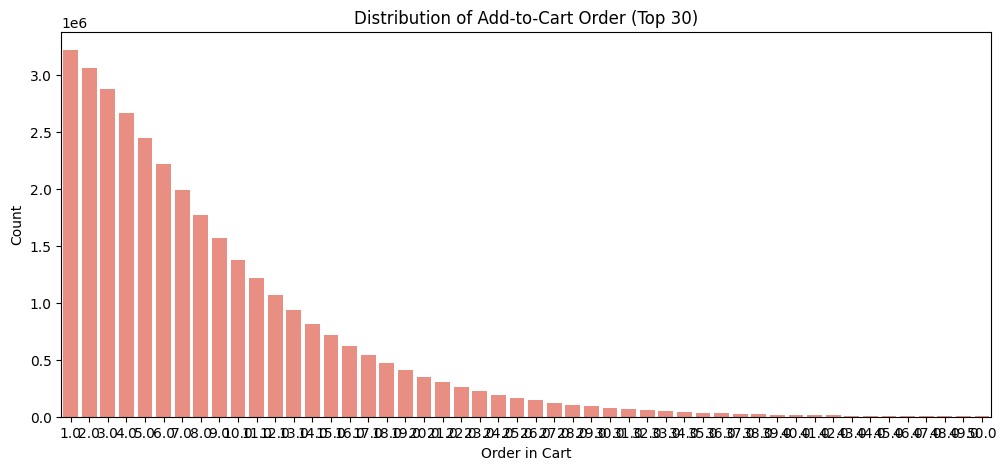

In [18]:
cart_dist = My_Data['add_to_cart_order'].value_counts().head(50)

plt.figure(figsize=(12, 5))
sns.barplot(x=cart_dist.index, y=cart_dist.values, color='salmon')
plt.title('Distribution of Add-to-Cart Order (Top 30)')
plt.xlabel('Order in Cart')
plt.ylabel('Count')
plt.show()

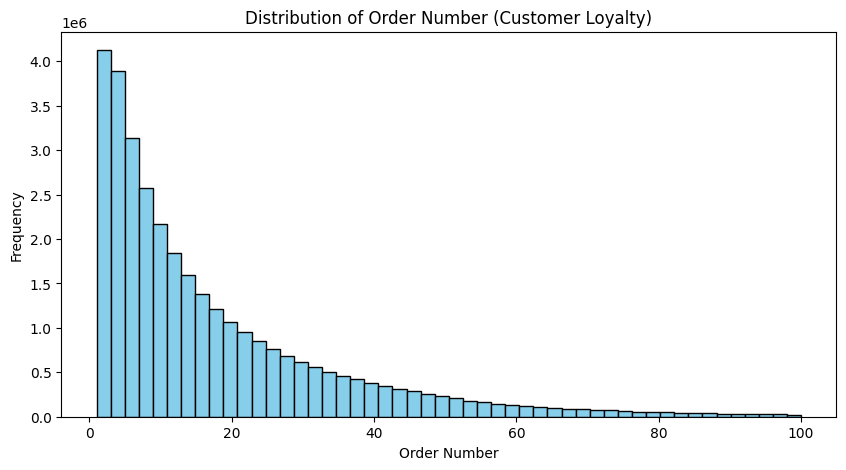

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(My_Data['order_number'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Number (Customer Loyalty)')
plt.xlabel('Order Number')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-2733072743.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Not Reordered (0)', 'Reordered (1)'], y=reorder_dist.values, palette='Set2')


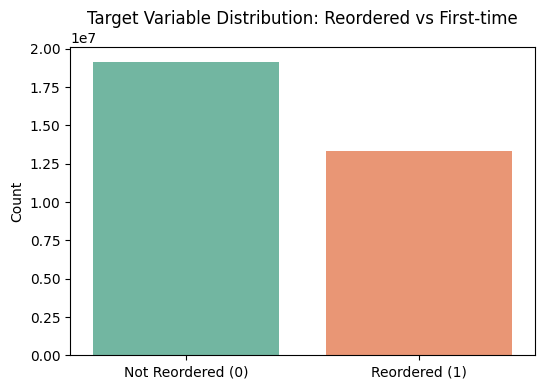

In [20]:
reorder_dist = My_Data['reordered'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=['Not Reordered (0)', 'Reordered (1)'], y=reorder_dist.values, palette='Set2')
plt.title('Target Variable Distribution: Reordered vs First-time')
plt.ylabel('Count')
plt.show()

# **• Categorical cardinality analysis (barplots / top-k frequencies)**

/tmp/ipython-input-3112498604.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_aisles.values, y=top_aisles.index, palette='magma')


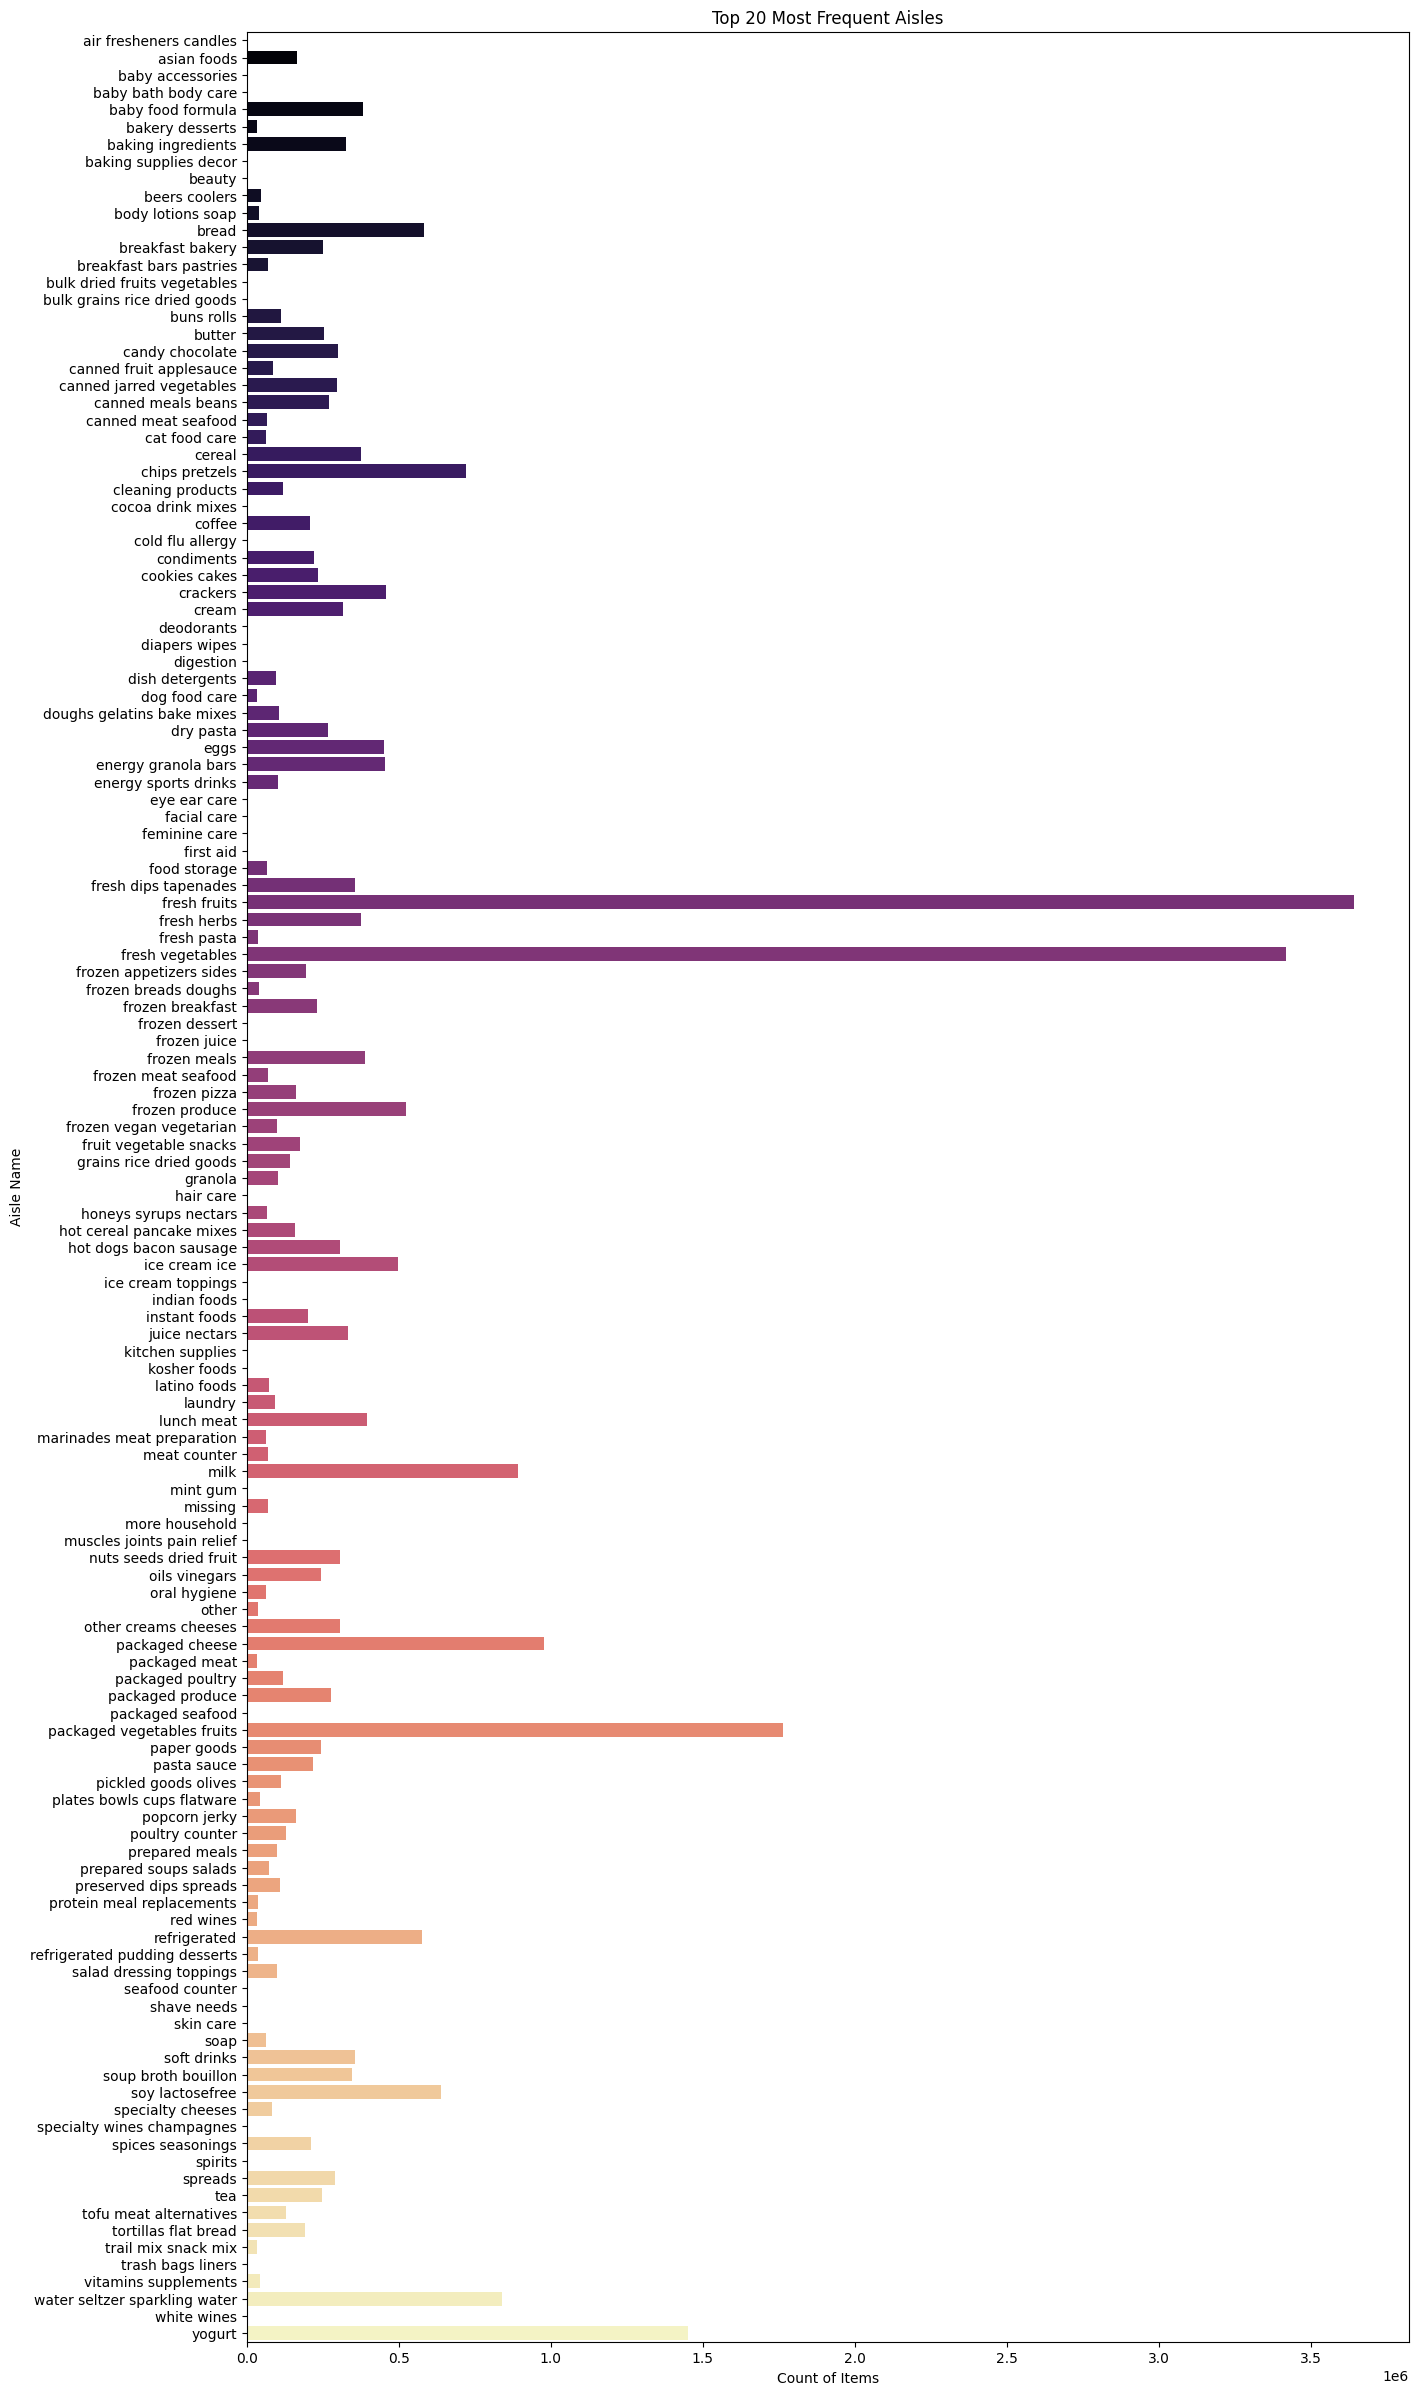

In [21]:
top_aisles = My_Data['aisle'].value_counts().head(100)

plt.figure(figsize=(15, 30))
sns.barplot(x=top_aisles.values, y=top_aisles.index, palette='magma')
plt.title('Top 20 Most Frequent Aisles')
plt.xlabel('Count of Items')
plt.ylabel('Aisle Name')
plt.show()

/tmp/ipython-input-3313061977.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_freq.values, y=dept_freq.index, palette='viridis')


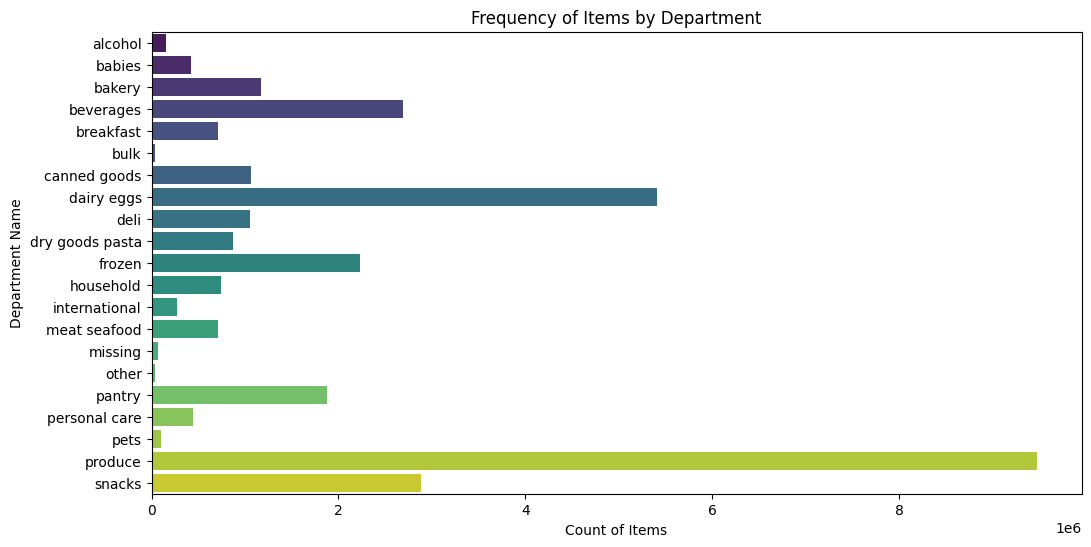

In [22]:
dept_freq = My_Data['department'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=dept_freq.values, y=dept_freq.index, palette='viridis')
plt.title('Frequency of Items by Department')
plt.xlabel('Count of Items')
plt.ylabel('Department Name')
plt.show()

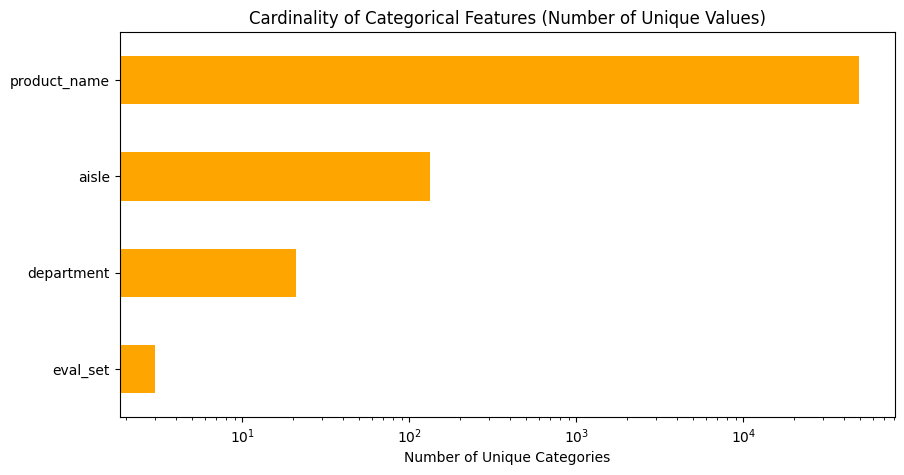

In [23]:
categorical_cols = ['aisle', 'department', 'product_name', 'eval_set']
cardinality = My_Data[categorical_cols].nunique().sort_values()

plt.figure(figsize=(10, 5))
cardinality.plot(kind='barh', color='orange')
plt.title('Cardinality of Categorical Features (Number of Unique Values)')
plt.xlabel('Number of Unique Categories')
plt.xscale('log')
plt.show()

# **Correlation matrix, heatmap and pairwise scatter plots for selected numeric features.**

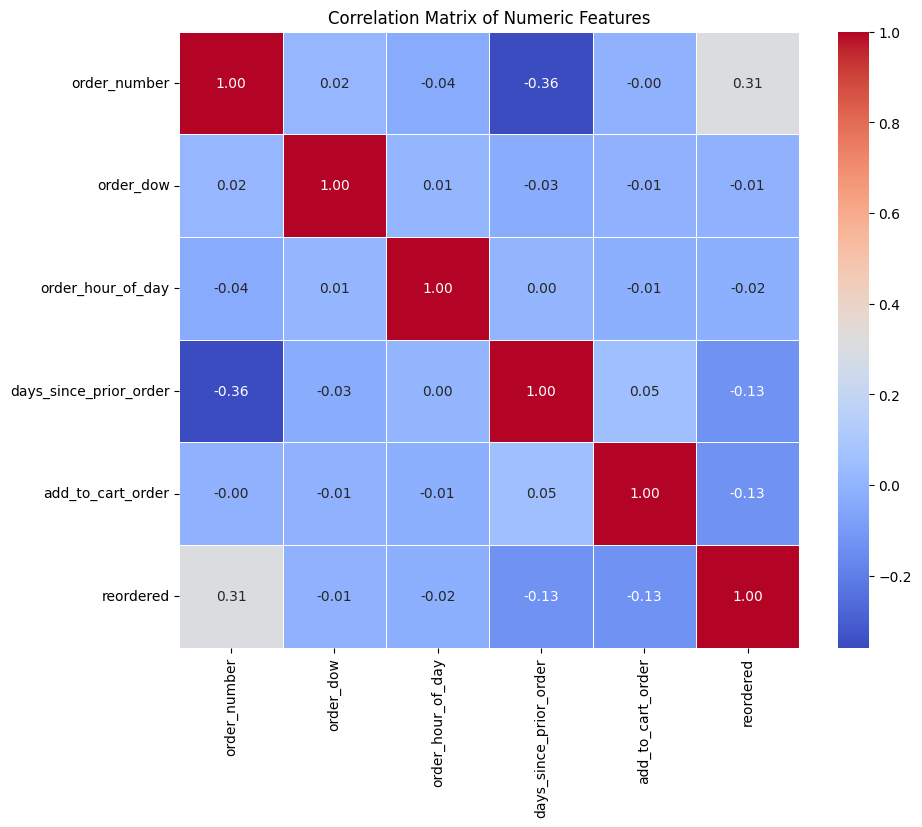

In [24]:
numeric_cols = ['order_number', 'order_dow', 'order_hour_of_day',
                'days_since_prior_order', 'add_to_cart_order', 'reordered']

corr_matrix = My_Data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

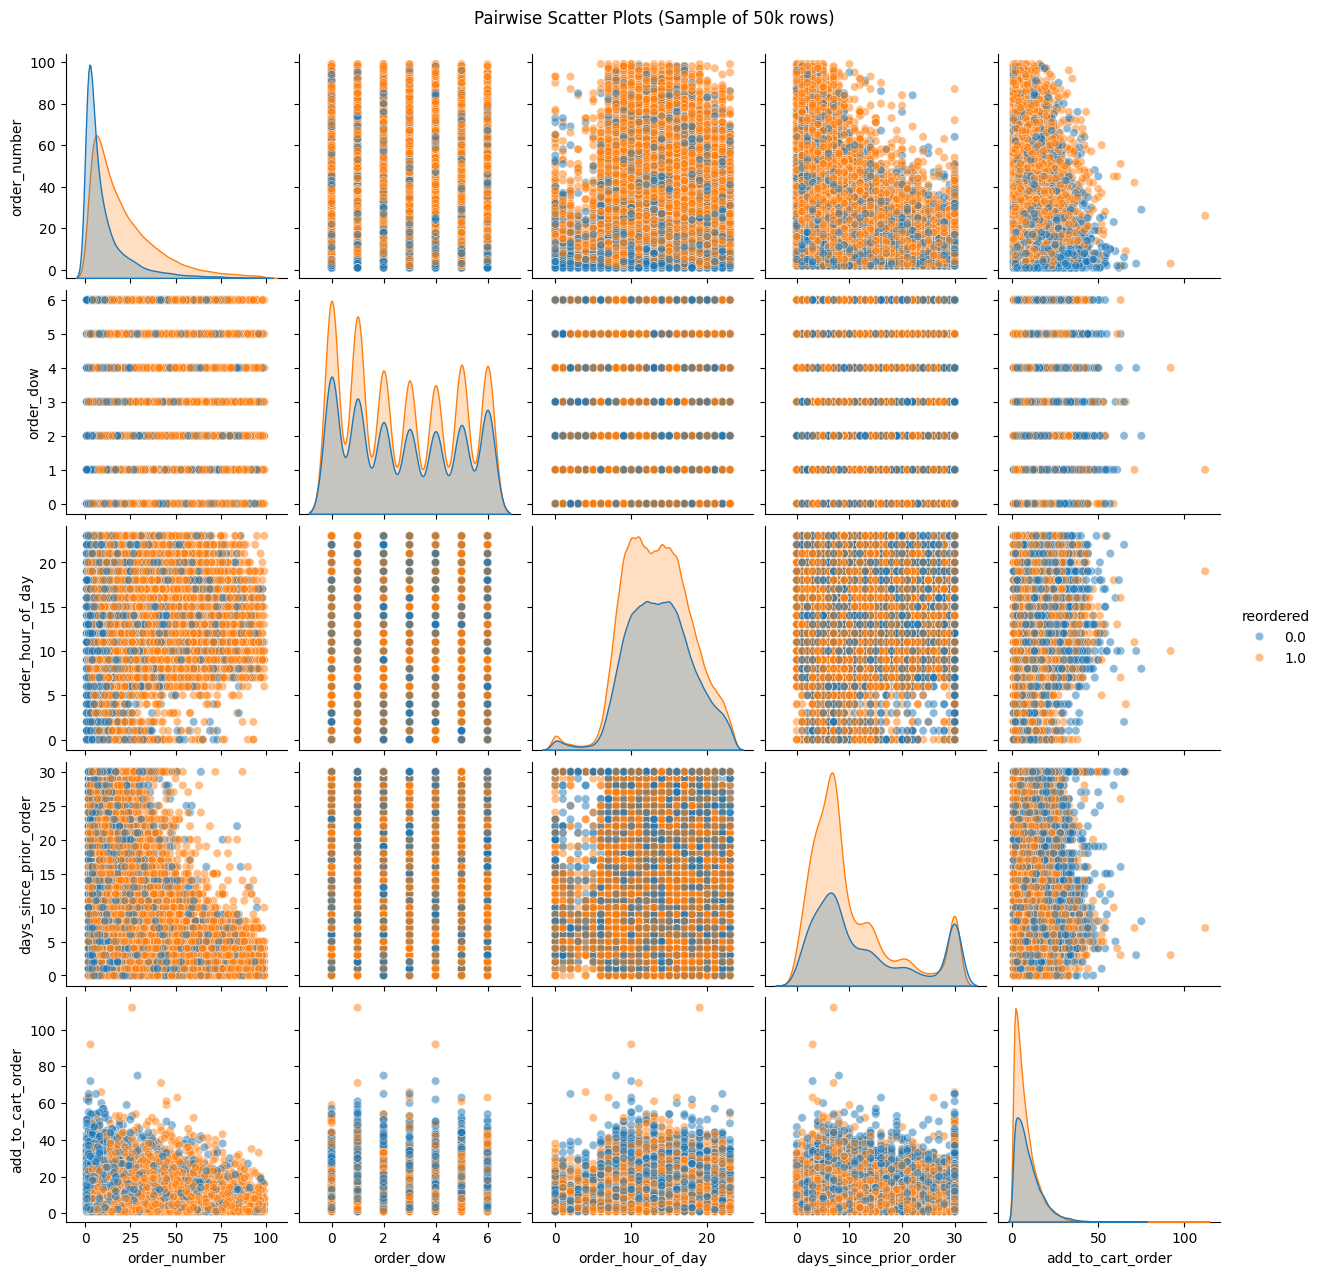

In [25]:
data_sample = My_Data[numeric_cols].sample(50000)
sns.pairplot(data_sample, hue='reordered', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Scatter Plots (Sample of 50k rows)', y=1.02)
plt.show()

# **• Time-of-day, day-of-week, and monthly seasonality plots.**

**Time-of-day**

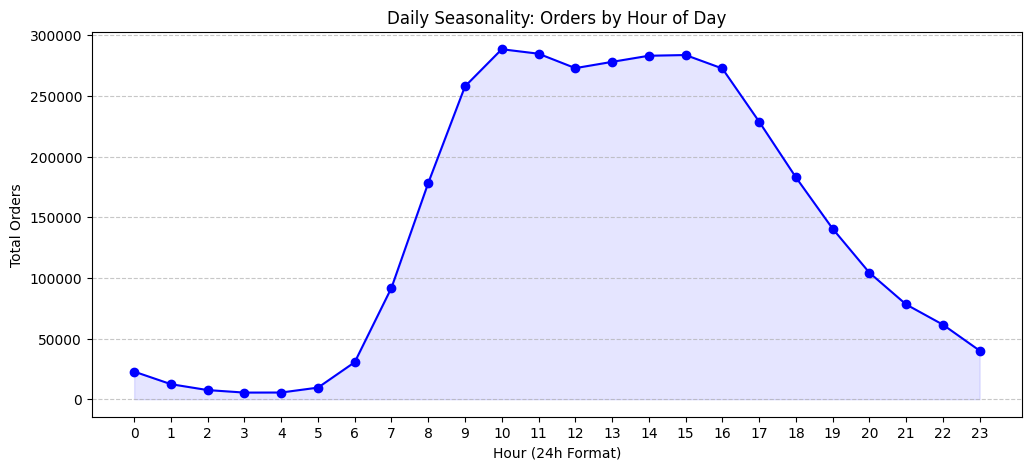

In [26]:
hourly_season = My_Data.groupby('order_hour_of_day')['order_id'].nunique()

plt.figure(figsize=(12, 5))
plt.plot(hourly_season.index, hourly_season.values, marker='o', linestyle='-', color='b')
plt.fill_between(hourly_season.index, hourly_season.values, alpha=0.1, color='b')
plt.title('Daily Seasonality: Orders by Hour of Day')
plt.xlabel('Hour (24h Format)')
plt.ylabel('Total Orders')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.show()

**day-of-week**

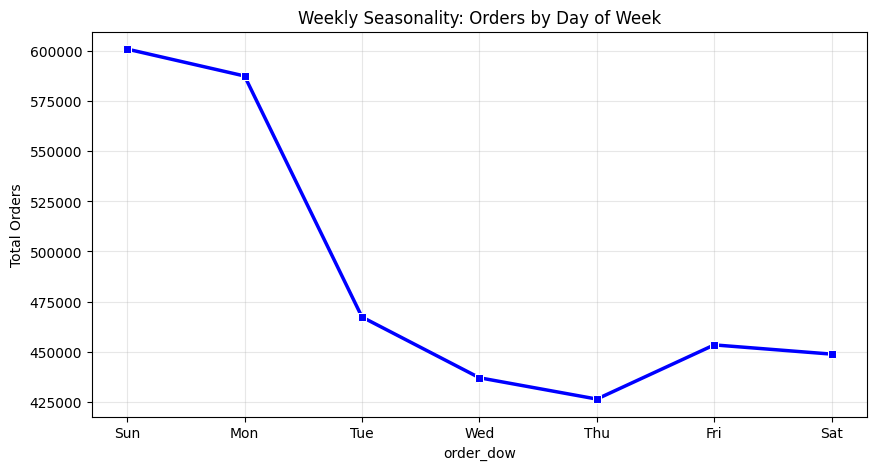

In [27]:
weekly_season = My_Data.groupby('order_dow')['order_id'].nunique()

plt.figure(figsize=(10, 5))
sns.lineplot(x=weekly_season.index, y=weekly_season.values, marker='s', color='b', linewidth=2.5)
plt.title('Weekly Seasonality: Orders by Day of Week')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.ylabel('Total Orders')
plt.grid(True, alpha=0.3)
plt.show()